In [1]:
# Import libraries

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Read dataset

df = pd.read_csv('cardiovascular-disease-death-rates-by-age.csv')

df.head(10)

,Entity,Code,Year,"Under-5s (per 100,000)","All ages (per 100,000)","70+ years old (per 100,000)","50-69 years old (per 100,000)","Age-standardized (per 100,000)","5-14 years old (per 100,000)","15-49 years old (per 100,000)"
0,Afghanistan,AFG,1990,12.411882,464.684360,6221.632582,1611.932015,747.110547,2.529741,121.847416
1,Afghanistan,AFG,1991,11.271689,451.803587,6212.581040,1619.123053,746.567118,2.407870,115.404179
2,Afghanistan,AFG,1992,9.198384,393.831836,6227.448687,1630.049686,749.068968,2.312031,100.125246
3,Afghanistan,AFG,1993,8.983559,349.916918,6261.371921,1651.750275,755.922388,2.366578,90.659302
4,Afghanistan,AFG,1994,9.578199,341.815666,6316.084616,1684.617386,766.065707,2.405727,89.965120
5,Afghanistan,AFG,1995,9.439519,330.628555,6318.349060,1696.650654,768.555180,2.403594,87.670339
6,Afghanistan,AFG,1996,8.815885,319.578155,6311.386789,1707.164761,771.332032,2.297966,87.263015
7,Afghanistan,AFG,1997,8.428448,310.954746,6306.053379,1720.017016,774.387732,2.238726,87.938676
8,Afghanistan,AFG,1998,8.111802,304.019530,6296.255326,1733.143125,776.167538,2.169677,88.929705
9,Afghanistan,AFG,1999,8.014682,305.390978,6287.279020,1748.553516,778.022703,2.121036,92.911051


In [3]:
# Rename lengthy column headers

df = df.rename(columns={'Under-5s (per 100,000)':'<5',
                        '5-14 years old (per 100,000)':'5-14',
                        '15-49 years old (per 100,000)':'15-49',
                        '50-69 years old (per 100,000)':'50-69',
                        '70+ years old (per 100,000)':'70+'})

df.head()

,Entity,Code,Year,<5,"All ages (per 100,000)",70+,50-69,"Age-standardized (per 100,000)",5-14,15-49
0,Afghanistan,AFG,1990,12.411882,464.684360,6221.632582,1611.932015,747.110547,2.529741,121.847416
1,Afghanistan,AFG,1991,11.271689,451.803587,6212.581040,1619.123053,746.567118,2.407870,115.404179
2,Afghanistan,AFG,1992,9.198384,393.831836,6227.448687,1630.049686,749.068968,2.312031,100.125246
3,Afghanistan,AFG,1993,8.983559,349.916918,6261.371921,1651.750275,755.922388,2.366578,90.659302
4,Afghanistan,AFG,1994,9.578199,341.815666,6316.084616,1684.617386,766.065707,2.405727,89.965120


In [4]:
# Drop irrelevant columns 
# Group by 'Year'
# Aggregate age columns

df_1 = df.groupby(['Year'], as_index=False).agg({'<5':'mean', 
                                                 '5-14':'mean', 
                                                 '15-49':'mean',
                                                 '50-69':'mean',
                                                 '70+':'mean'})

print(df_1.shape)

(28, 6)


In [5]:
df_1.head()

,Year,<5,5-14,15-49,50-69,70+
0,1990,12.008564,2.447569,40.458146,634.624397,3696.931021
1,1991,11.600164,2.405775,40.405391,631.477414,3675.231149
2,1992,11.207900,2.368068,40.690747,632.195174,3669.296347
3,1993,10.854618,2.318474,41.295011,637.516745,3677.783458
4,1994,10.522106,2.275436,41.831741,640.115585,3656.574091


In [6]:
# Use melt() to combine age ranges into one column, 'Age'
# Create new column, 'Total'

df_1 = pd.melt(df_1, 
               id_vars=['Year'], 
               var_name='Age',
               value_name='Total')

df_1.head(10)

,Year,Age,Total
0,1990,<5,12.008564
1,1991,<5,11.600164
2,1992,<5,11.207900
3,1993,<5,10.854618
4,1994,<5,10.522106
5,1995,<5,10.112276
6,1996,<5,9.743130
7,1997,<5,9.415520
8,1998,<5,9.094948
9,1999,<5,8.828342


In [7]:
df_1.tail(10)

,Year,Age,Total
130,2008,70+,3014.431970
131,2009,70+,2979.178971
132,2010,70+,2949.240848
133,2011,70+,2915.306846
134,2012,70+,2891.056538
135,2013,70+,2868.425766
136,2014,70+,2855.576767
137,2015,70+,2862.713561
138,2016,70+,2851.476646
139,2017,70+,2832.918629


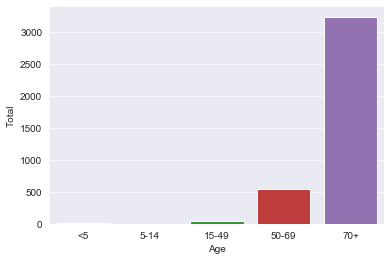

In [8]:
# Plot the results

sns.barplot(x='Age', y='Total', data=df_1, ci=None)
plt.show()

In [9]:
# Save the dataframe to a new .csv file

df_1.to_csv('cleaned_heart_and_aging.csv', index=None)